In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [4]:
df=pd.read_csv("zomato_data.csv")
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


In [5]:
df['rate'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 148 entries, 0 to 147
Series name: rate
Non-Null Count  Dtype 
--------------  ----- 
148 non-null    object
dtypes: object(1)
memory usage: 1.3+ KB


In [6]:
def handle(value):
        value = str(value).split('/')[0]  # Split and take the first part
        return value   

df['rate'] = df['rate'].apply(handle)
df


,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3,0,100,Dining
144,New Indraprasta,No,No,3.3,0,150,Dining
145,Anna Kuteera,Yes,No,4.0,771,450,Dining
146,Darbar,No,No,3.0,98,800,Dining


In [7]:
df['rate'] = df['rate'].astype(float)

In [8]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


Text(0.5, 0, 'Type of restaurant')

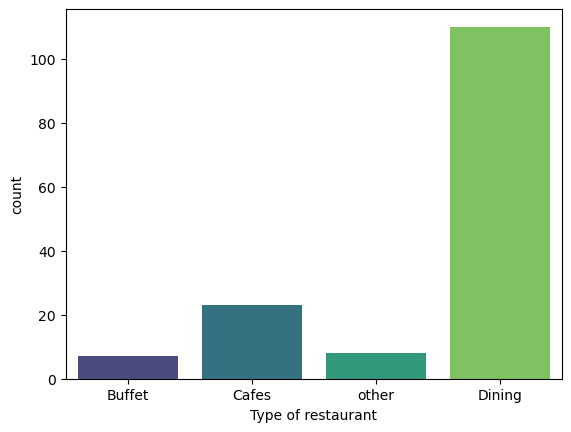

In [9]:
sn.countplot(x=df['listed_in(type)'], hue=df['listed_in(type)'], palette='viridis', legend=False)
plt.xlabel("Type of restaurant")

Text(0, 0.5, 'Votes')

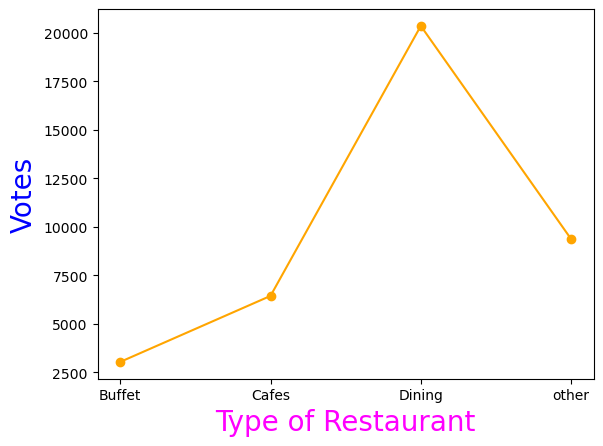

In [10]:
grouped_data = df.groupby('listed_in(type)')['votes'].sum()
# Creating a result DataFrame
result = pd.DataFrame({'votes': grouped_data})
plt.plot(result, color="orange",marker="o")
plt.xlabel("Type of Restaurant", color="magenta", fontsize=20)
plt.ylabel("Votes", color="blue", fontsize=20)

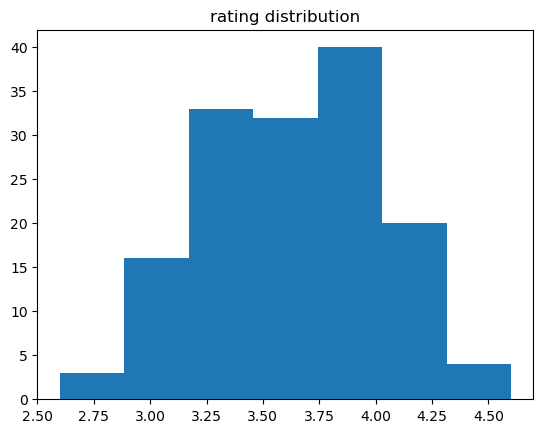

In [11]:
plt.hist(df['rate'],bins=7)
plt.title("rating distribution")
plt.show()

<Axes: xlabel='approx_cost(for two people)', ylabel='count'>

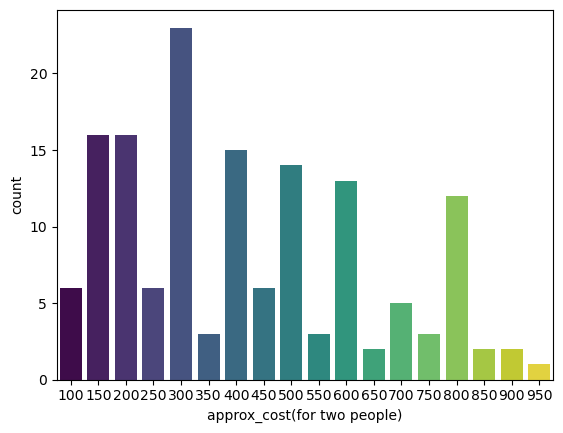

In [12]:
data=df['approx_cost(for two people)']
sn.countplot(x=data,hue=data, palette='viridis',legend=False)

<Axes: xlabel='online_order', ylabel='rate'>

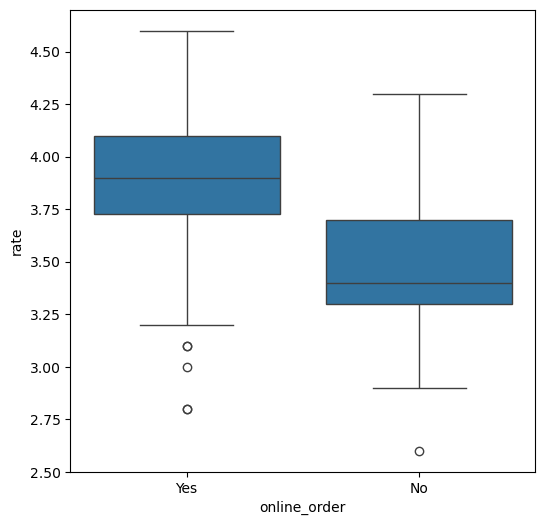

In [13]:
plt.figure(figsize=(6,6))
sn.boxplot(x="online_order",y='rate',data=df)

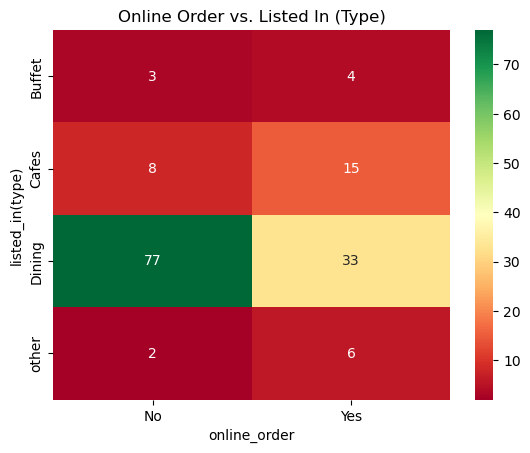

In [17]:
pivot_table = df.pivot_table(index='listed_in(type)', columns='online_order', aggfunc='size', fill_value=0)
sn.heatmap(pivot_table, annot=True, cmap='RdYlGn', fmt='d')
plt.title('Online Order vs. Listed In (Type)')
plt.show()